In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../datasets/household_power_consumption_v2.txt', sep=';', na_values=['nan','?'], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
df.head(5)

,date,time,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day_of_week,day,month,year,time_formatted
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,16,12,2006,17:24:00
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,16,12,2006,17:25:00
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,16,12,2006,17:26:00
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,16,12,2006,17:27:00
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,16,12,2006,17:28:00


In [3]:
# cols = ['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'kitchen', 'laundry_room', 'thermal_utilities']
# for col in cols:
#     df[col] = df[col].astype(float)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'kitchen', 'laundry_room', 'thermal_utilities']])

In [5]:
# for idx, row in df[['time', 'date', 'global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'kitchen', 'laundry_room', 'thermal_utilities']].iterrows():
#     if row['global_active_power'] == '?':
#         print(row['global_active_power'], ' ', row['date'], ' ', row['time'])
#         # break

In [6]:
df.loc[(df['global_active_power'].isna()) & (df['thermal_utilities'].isna())]

,date,time,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day_of_week,day,month,year,time_formatted
6839,2006-12-21,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,21,12,2006,11:23:00
6840,2006-12-21,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,21,12,2006,11:24:00
19724,2006-12-30,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,30,12,2006,10:08:00
19725,2006-12-30,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,30,12,2006,10:09:00
41832,2007-01-14,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,14,1,2007,18:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990185,2010-09-28,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,28,9,2010,19:09:00
1990186,2010-09-28,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,28,9,2010,19:10:00
1990187,2010-09-28,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,28,9,2010,19:11:00
1990188,2010-09-28,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,28,9,2010,19:12:00


In [7]:
df.isna().sum()

date                         0
time                         0
global_active_power      25979
global_reactive_power    25979
voltage                  25979
global_intensity         25979
kitchen                  25979
laundry_room             25979
thermal_utilities        25979
day_of_week                  0
day                          0
month                        0
year                         0
time_formatted               0
dtype: int64

In [8]:
import plotly.express as px
# fig = px.line(df2, x='time', y=["mov_avg", 'global_active_power'])
fig = px.line(df[df['date'] == '2007-01-14'], x='time', y=["global_active_power"])
fig.show()

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\sclab\AppData\Local\Temp\ipykernel_11308\4098886997.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



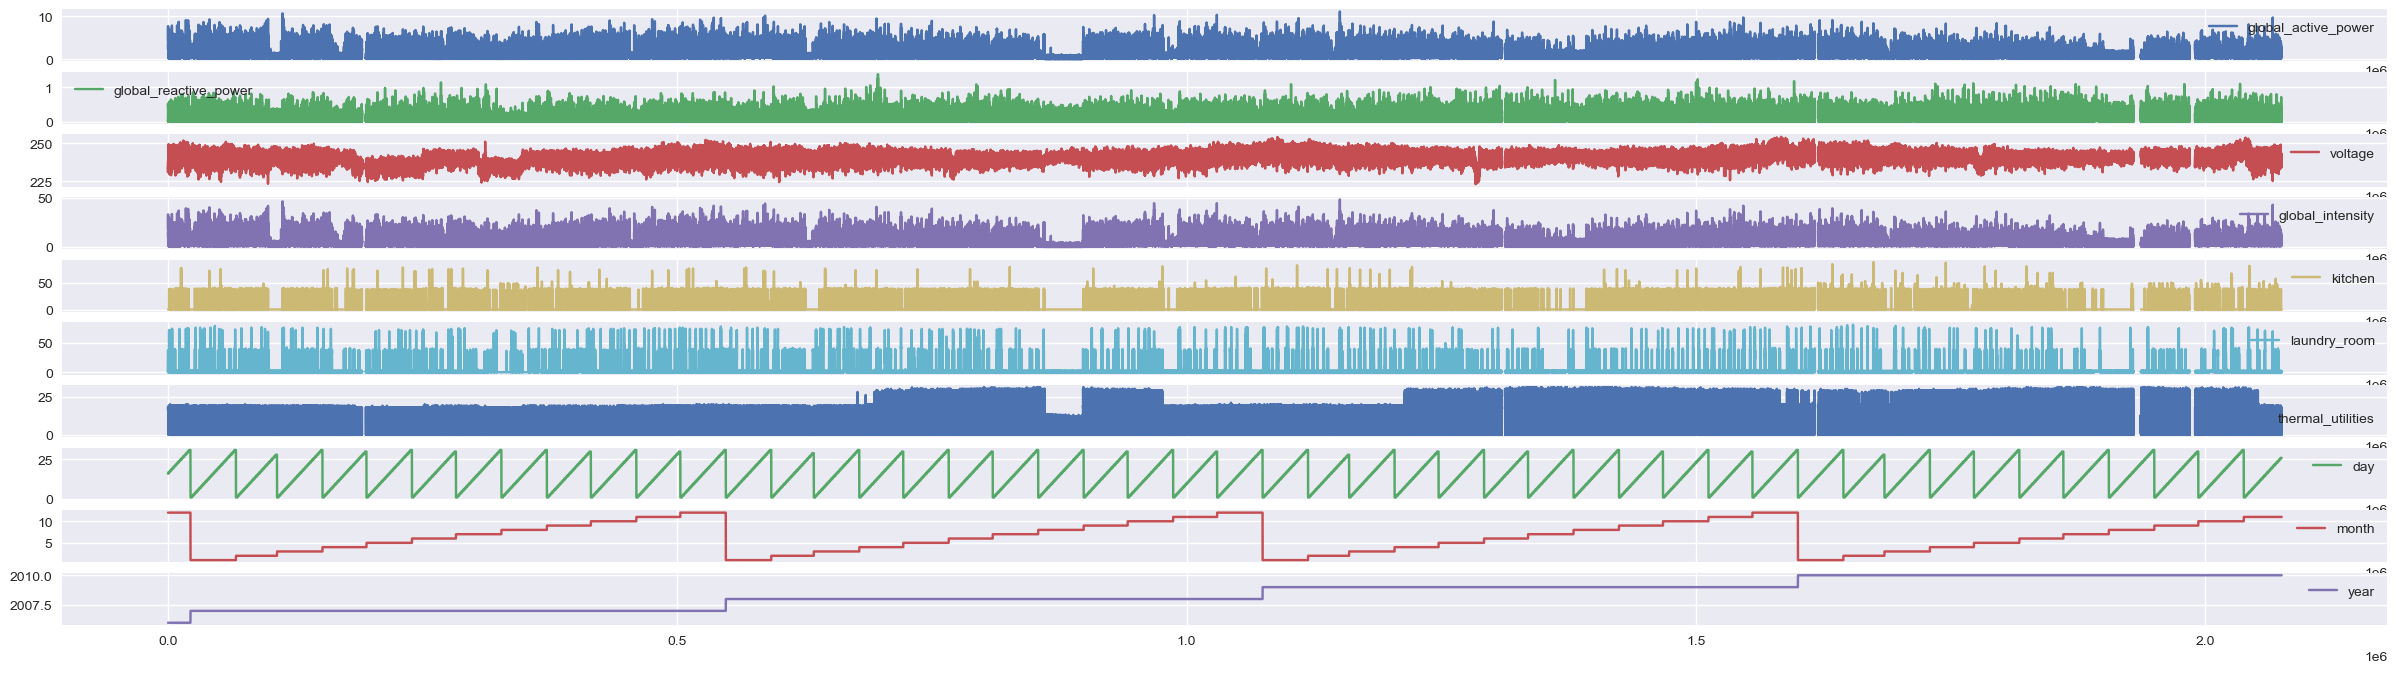

In [10]:
df.plot(subplots=True, figsize=(30,8))
plt.show()

### Imputation

In [16]:
def impute_nan_values(df):
    
    """
    Function to impute values
    
    Input : Dataframe with missing values
    Output : Dataframe with imputed values
    """
    
    data = []
    for d in list(df.groupby(df.year)):
        
        data.append(d[1].fillna(d[1].mean()))
        
    return pd.DataFrame(np.vstack(data), index=df.index, columns=df.columns)

In [39]:
df = pd.read_csv('../datasets/household_power_consumption_v2.txt', parse_dates={'datetime' : ['date','time']}, infer_datetime_format=True, index_col='datetime', sep=';', na_values=['nan','?'], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
df.head(5)

C:\Users\sclab\AppData\Local\Temp\ipykernel_11308\3380356991.py:1: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



,global_active_power,global_reactive_power,voltage,global_intensity,kitchen,laundry_room,thermal_utilities,day_of_week,day,month,year,time_formatted
datetime,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,16,12,2006,17:24:00
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,16,12,2006,17:25:00
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,16,12,2006,17:26:00
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,16,12,2006,17:27:00
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,16,12,2006,17:28:00


In [41]:
# ["date", "time", "global_active_power", "global_reactive_power", "voltage", "global_intensity", "kitchen", "laundry_room", "thermal_utilities", "day", "month", "year"]
df2 = df[["global_active_power", "global_reactive_power", "voltage", "global_intensity", "kitchen", "laundry_room", "thermal_utilities"]]
data = []
for d in df2[["global_active_power", "global_reactive_power", "voltage", "global_intensity", "kitchen", "laundry_room", "thermal_utilities"]].groupby(df2.index.year):
    data.append(d[1].fillna(d[1].mean()))
pd.DataFrame(np.vstack(data), index=df2.index, columns=df2.columns)

ValueError: Shape of passed values is (2075259, 7), indices imply (2075259, 12)

In [37]:
df.index

Index(['2006-12-16', '2006-12-16', '2006-12-16', '2006-12-16', '2006-12-16',
       '2006-12-16', '2006-12-16', '2006-12-16', '2006-12-16', '2006-12-16',
       ...
       '2010-11-26', '2010-11-26', '2010-11-26', '2010-11-26', '2010-11-26',
       '2010-11-26', '2010-11-26', '2010-11-26', '2010-11-26', '2010-11-26'],
      dtype='object', name='date', length=2075259)